In [25]:
%load_ext autoreload

%autoreload 2

from glob import glob
import os
import pickle

import scipy.linalg
import matplotlib.pyplot as plt
import numpy as np

import emcee

import kepler
import threebody

import minuit_wrap
%matplotlib inline

import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logging.debug("test")

DEBUG:root:test


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [150]:
d = pickle.load(open("fitter_params.pickle"))
F = threebody.Fitter(**d)
F.parameters

DEBUG:threebody:Fitting DM
DEBUG:threebody:base telescope AO_1400 from list of ['AO_1400', 'AO_430', 'GBT_1400', 'WSRT_1400', 'WSRT_350']


['asini_i',
 'pb_i',
 'eps1_i',
 'eps2_i',
 'tasc_i',
 'acosi_i',
 'q_i',
 'asini_o',
 'pb_o',
 'eps1_o',
 'eps2_o',
 'tasc_o',
 'acosi_o',
 'delta_lan']

DEBUG:threebody:Started residuals for {'f0': 365.95336876828094, 'shapiro': True, 'pm_x': -4.7253571656398304e-11, 'pm_y': 5.176655321908803e-11, 'j_NCY1400': 0.000675, 'asini_i': 1.2175267840763296957, 'eps2_i': -9.115527301096248838e-05, 'delta_lan': -8.5659925312170722909e-06, 'eps2_o': -0.0034621974697836775743, 'q_i': 0.13726519094335587045, 'asini_o': 74.672701795905153006, 'j_GBT350': 1.8510494219682503864e-05, 'dgamma': 1.175749501990592583e-06, 'tasc_i': 0.40771702901558446841, 'ppn_mode': 'GR', 'd_RAJ': -3.2388334094615887816e-08, 'acosi_i': 1.4917501887350015597, 'acosi_o': 91.537983170852789176, 'special': True, 'tasc_o': 313.93575748653280483, 'eps1_o': 0.035186237412951548661, 'eps1_i': 0.00068718344326590147168, 'tol': 1e-16, 'd_PMRA': 9.885280864586482e-11, 'j_WSRT350': -3.6586764591042250491e-05, 'd_PMDEC': -1.9580532733266362e-10, 'lan': 22.854202311569486596, 'j_GBT820': 6.7999885696179984064e-05, 'use_quad': False, 'd_PX': -0.92477760701603597092, 'matrix_mode': 0, 

DEBUG:threebody:svdvals: [  1.82956755e+18   3.26715481e+09   3.41607184e+07   1.30686892e+06
   4.96520847e+04   1.92904219e+03   1.33169934e+02   7.34374954e+01
   5.03260709e+01   3.42351229e+01   6.97243244e+00   4.76820406e+00
   1.40871835e-05]
DEBUG:threebody:Linear least-squares residual RMS 0.00148804
DEBUG:threebody:Done linear least-squares


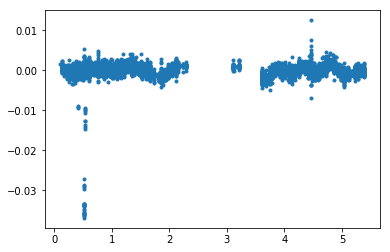

In [151]:
res = F.residuals(F.best_parameters)
plt.plot(F.mjds/365.2425, res, '.')

In [152]:
values, names = F.compute_linear_parts()
print zip(names,values)

DEBUG:threebody:Computing linear parts
DEBUG:threebody:Computing linear matrix
DEBUG:threebody:Started compute_orbit for {'f0': 365.95336876828094, 'shapiro': True, 'pm_x': -4.7253571656398304e-11, 'pm_y': 5.176655321908803e-11, 'j_NCY1400': 0.000675, 'asini_i': 1.2175267840763296957, 'eps2_i': -9.115527301096248838e-05, 'delta_lan': -8.5659925312170722909e-06, 'eps2_o': -0.0034621974697836775743, 'q_i': 0.13726519094335587045, 'asini_o': 74.672701795905153006, 'j_GBT350': 1.8510494219682503864e-05, 'dgamma': 1.175749501990592583e-06, 'tasc_i': 0.40771702901558446841, 'ppn_mode': 'GR', 'd_RAJ': -3.2388334094615887816e-08, 'acosi_i': 1.4917501887350015597, 'acosi_o': 91.537983170852789176, 'special': True, 'tasc_o': 313.93575748653280483, 'eps1_o': 0.035186237412951548661, 'eps1_i': 0.00068718344326590147168, 'tol': 1e-16, 'd_PMRA': 9.885280864586482e-11, 'j_WSRT350': -3.6586764591042250491e-05, 'd_PMDEC': -1.9580532733266362e-10, 'lan': 22.854202311569486596, 'j_GBT820': 6.799988569617

[('d_DECJ', -128884078.56832076362), ('d_DM', 1.4574740540985070386e-05), ('d_PMDEC', 153542.45135060441592), ('d_PMRA', -39969.856805375850545), ('d_PX', -1.2664511370443758319), ('d_RAJ', 34179944.779939768636), ('f0', 183.15942756544518867), ('f1', 9.9403081547615745427e-07), ('j_AO_430', 5518.3924315993675918), ('j_GBT_1400', 319154.7141881664266), ('j_WSRT_1400', -54582.281052915848818), ('j_WSRT_350', -182.34837992193180239), ('phase', -3125689.1616540909934)]


In [153]:
A, names = F.compute_linear_matrix()

DEBUG:threebody:Computing linear matrix
DEBUG:threebody:Started compute_orbit for {'f0': 365.95336876828094, 'shapiro': True, 'pm_x': -4.7253571656398304e-11, 'pm_y': 5.176655321908803e-11, 'j_NCY1400': 0.000675, 'asini_i': 1.2175267840763296957, 'eps2_i': -9.115527301096248838e-05, 'delta_lan': -8.5659925312170722909e-06, 'eps2_o': -0.0034621974697836775743, 'q_i': 0.13726519094335587045, 'asini_o': 74.672701795905153006, 'j_GBT350': 1.8510494219682503864e-05, 'dgamma': 1.175749501990592583e-06, 'tasc_i': 0.40771702901558446841, 'ppn_mode': 'GR', 'd_RAJ': -3.2388334094615887816e-08, 'acosi_i': 1.4917501887350015597, 'acosi_o': 91.537983170852789176, 'special': True, 'tasc_o': 313.93575748653280483, 'eps1_o': 0.035186237412951548661, 'eps1_i': 0.00068718344326590147168, 'tol': 1e-16, 'd_PMRA': 9.885280864586482e-11, 'j_WSRT350': -3.6586764591042250491e-05, 'd_PMDEC': -1.9580532733266362e-10, 'lan': 22.854202311569486596, 'j_GBT820': 6.7999885696179984064e-05, 'use_quad': False, 'd_PX':

In [154]:
b = F.pulses.copy()
As = A/F.phase_uncerts[:,None]
bs = b/F.phase_uncerts
sAs = As/np.sqrt(np.sum(As**2,axis=0))
scipy.linalg.lstsq(sAs, bs)

(array([  8.96966950e+02,  -2.17887500e+03,   4.55454883e+03,
         -6.06200391e+03,  -7.43984375e+01,  -1.39990625e+03,
          1.70665705e+16,  -7.54151281e+06,   1.35618029e+04,
         -9.87101562e+02,  -4.18345703e+02,   1.20860278e+03,
         -3.87468530e+15]),
 312269.09014195582,
 13,
 array([ 2.00310152,  1.50430257,  1.36017968,  1.15023519,  1.01972204,
         0.99996378,  0.83399803,  0.77487328,  0.42004397,  0.11739916,
         0.11251871,  0.09691537,  0.05927804]))

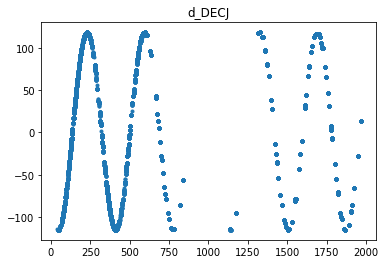

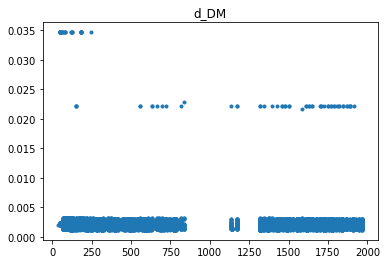

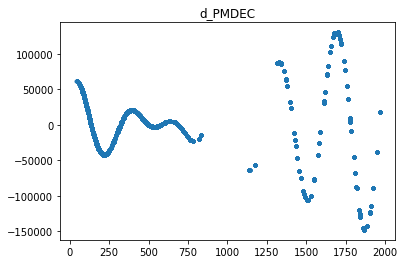

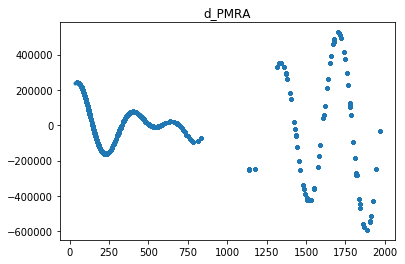

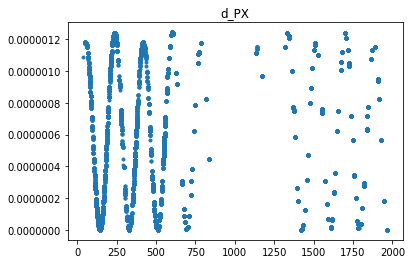

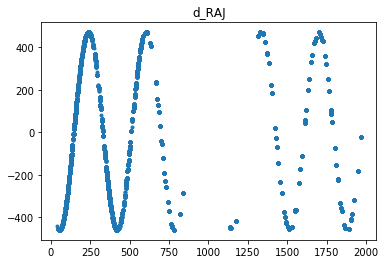

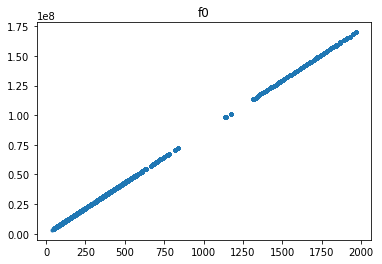

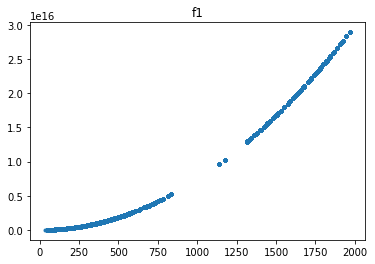

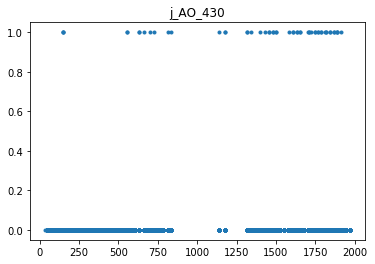

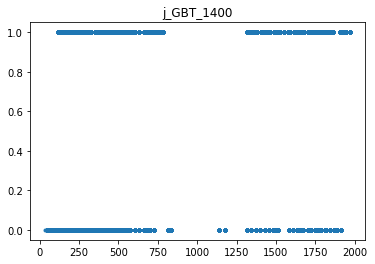

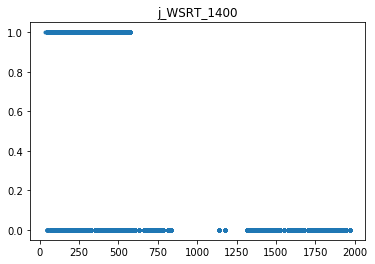

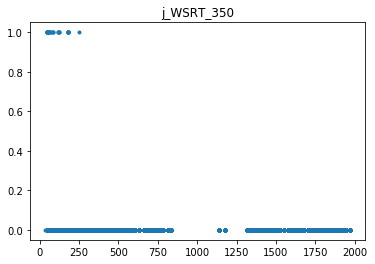

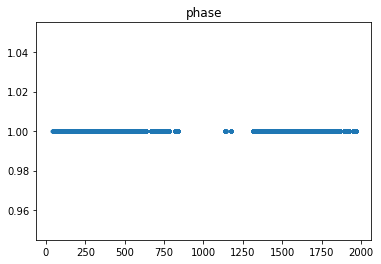

In [155]:
for i,n in enumerate(names):
    c = A[:,i].copy()
    #c /= np.sqrt(np.sum(c**2))
    plt.figure()
    plt.plot(F.mjds, c, ".")
    plt.title(n)
#plt.legend()
plt.figure()

[ 6420.35275028  5765.13777892  4086.52005165   464.4206806    424.60844208]
[ 6420.35275028  5765.13777892  4086.52005165   464.4206806    424.60844208]


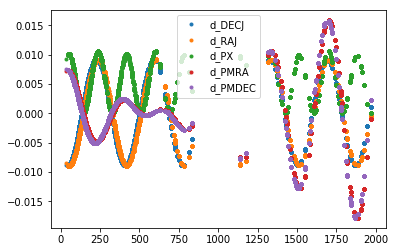

In [156]:
def show_vectors(ns):
    cols = []
    for n in ns:
        i = names.index(n)
        c = A[:,i].copy()
        c /= np.sqrt(np.sum(c**2))
        plt.plot(F.mjds, c, ".", label=n)
        cols.append(c)
    plt.legend(loc="best")
    Aa = np.array(cols).T/F.phase_uncerts[:,None]
    print scipy.linalg.svdvals(Aa)
    x, rk, res, s = scipy.linalg.lstsq(Aa, np.zeros(Aa.shape[0]))
    print s
    
show_vectors(["d_DECJ", "d_RAJ", "d_PX", "d_PMRA", "d_PMDEC"])

[ 9761.66399891  5387.62645474  2109.14990437  1850.69525917  1191.44357454
   571.05238898]
[ 9761.66399891  5387.62645474  2109.14990437  1850.69525917  1191.44357454
   571.05238898]


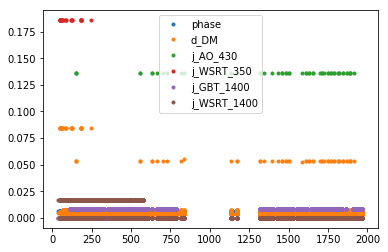

In [157]:
show_vectors(["phase", "d_DM", 
              "j_AO_430", "j_WSRT_350", "j_GBT_1400", "j_WSRT_1400"])

[ 10026.26477363   7377.85148559   6089.75230855   5770.36178343
   3370.81351036   1987.6932455    1938.05865139   1796.0496528
   1180.98697477    566.15199451    424.68368308    404.26673173
    239.9943294 ]
[ 10026.26477363   7377.85148559   6089.75230855   5770.36178343
   3370.81351036   1987.6932455    1938.05865139   1796.0496528
   1180.98697477    566.15199451    424.68368308    404.26673173
    239.9943294 ]


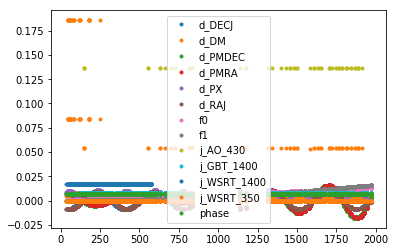

In [158]:
show_vectors(names)

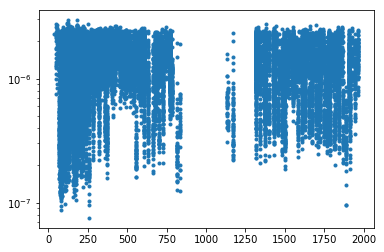

In [159]:
plt.semilogy(F.mjds, F.phase_uncerts/F.reference_f0, '.')

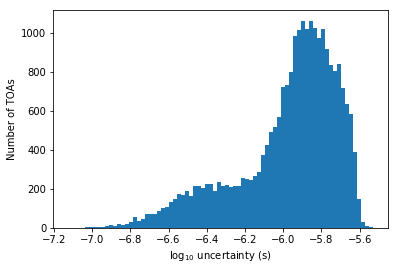

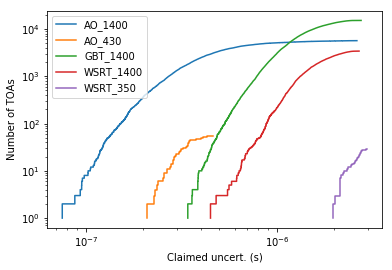

In [176]:
plt.hist(np.log10(F.phase_uncerts/F.reference_f0), bins='auto');
plt.xlabel(r"$\log_{10}$ uncertainty (s)")
plt.ylabel("Number of TOAs")
plt.figure()
for i,n in enumerate(F.tel_list):
    c = F.tels==i
    u = np.sort(F.phase_uncerts[c]/F.reference_f0)
    y = np.arange(len(u))+1
    plt.loglog(u,y,drawstyle="steps",label=n)
plt.legend(loc="upper left")
plt.xlabel("Claimed uncert. (s)")
plt.ylabel("Number of TOAs")
plt.savefig("uncert-hist.pdf")

In [166]:
len(F.mjds)

24301

## Check MINUIT function generator

The MINUIT wrapper I use relies on introspection to get parameter names and things. So I have to use jiggery-pokery to build a function it can be happy introspecting.

This is a little out of date because I've now switched to IMINUIT, which can have its introspection circumvented.

In [164]:
F.goodness_of_fit(F.best_parameters)

DEBUG:threebody:Started residuals for {'f0': 365.95336876828094, 'shapiro': True, 'pm_x': -4.7253571656398304e-11, 'pm_y': 5.176655321908803e-11, 'j_NCY1400': 0.000675, 'asini_i': 1.2175267840763296957, 'eps2_i': -9.115527301096248838e-05, 'delta_lan': -8.5659925312170722909e-06, 'eps2_o': -0.0034621974697836775743, 'q_i': 0.13726519094335587045, 'asini_o': 74.672701795905153006, 'j_GBT350': 1.8510494219682503864e-05, 'dgamma': 1.175749501990592583e-06, 'tasc_i': 0.40771702901558446841, 'ppn_mode': 'GR', 'd_RAJ': -3.2388334094615887816e-08, 'acosi_i': 1.4917501887350015597, 'acosi_o': 91.537983170852789176, 'special': True, 'tasc_o': 313.93575748653280483, 'eps1_o': 0.035186237412951548661, 'eps1_i': 0.00068718344326590147168, 'tol': 1e-16, 'd_PMRA': 9.885280864586482e-11, 'j_WSRT350': -3.6586764591042250491e-05, 'd_PMDEC': -1.9580532733266362e-10, 'lan': 22.854202311569486596, 'j_GBT820': 6.7999885696179984064e-05, 'use_quad': False, 'd_PX': -0.92477760701603597092, 'matrix_mode': 0, 

312216.55630751643866

In [165]:
mfun = F.make_mfun()
mfun(*[F.best_parameters[p] for p in F.parameters])

DEBUG:threebody:Started residuals for {'f0': 365.95336876828094, 'shapiro': True, 'pm_x': -4.7253571656398304e-11, 'pm_y': 5.176655321908803e-11, 'j_NCY1400': 0.000675, 'asini_i': 1.2175267840763296957, 'eps2_i': -9.115527301096248838e-05, 'delta_lan': -8.5659925312170722909e-06, 'eps2_o': -0.0034621974697836775743, 'q_i': 0.13726519094335587045, 'asini_o': 74.672701795905153006, 'j_GBT350': 1.8510494219682503864e-05, 'tasc_i': 0.40771702901558446841, 'dgamma': 1.175749501990592583e-06, 'ppn_mode': 'GR', 'dbeta': -0.00041698493776006720714, 'acosi_i': 1.4917501887350015597, 'acosi_o': 91.537983170852789176, 'special': True, 'tasc_o': 313.93575748653280483, 'eps1_o': 0.035186237412951548661, 'eps1_i': 0.00068718344326590147168, 'tol': 1e-16, 'd_PMRA': 9.885280864586482e-11, 'j_WSRT350': -3.6586764591042250491e-05, 'd_PMDEC': -1.9580532733266362e-10, 'lan': 22.854202311569486596, 'j_GBT820': 6.7999885696179984064e-05, 'use_quad': False, 'd_PX': -0.92477760701603597092, 'matrix_mode': 0, 

312216.55630751643866

## Check for longdouble cleanness

In [133]:
bp = F.best_parameters.copy()
bp

{'acosi_i': 1.4870073870355541638,
 'acosi_o': 91.237854534157803936,
 'asini_i': 1.2175283930291920819,
 'asini_o': 74.672699371706741871,
 'd_DECJ': -1.9668596769468923624e-07,
 'd_PMDEC': 0,
 'd_PMRA': 0,
 'd_PX': 0.82283538763088315271,
 'd_RAJ': 3.5759512633769490936e-08,
 'dbeta': 0,
 'delta': 0.0,
 'delta_lan': 3.6058449713963126572e-05,
 'dgamma': 0,
 'eps1_i': 0.00068568720817855979873,
 'eps1_o': 0.035186239648851740814,
 'eps2_i': -9.1739752941784908284e-05,
 'eps2_o': -0.0034621973342590981416,
 'f0': 365.95336876828094,
 'j_AO1350': 5.434208650373407444e-05,
 'j_AO1440': 4.894359871871847276e-05,
 'j_AO327': 6.5677301272928149774e-05,
 'j_GBT1500': 6.2346316822423221018e-05,
 'j_GBT350': 1.8551757984994333581e-05,
 'j_GBT820': 6.790490288616337796e-05,
 'j_NCY1400': 0.000675,
 'j_WSRT350': -3.6541215443850041834e-05,
 'lan': -134.38362335792677023,
 'pb_i': 1.6294018279029601442,
 'pb_o': 327.25749306877732375,
 'pm_x': -4.7253571656398304e-11,
 'pm_y': 5.176655321908803e-

In [134]:
bp["asini_i"] = 1+np.finfo(np.longdouble).eps
bp

{'acosi_i': 1.4870073870355541638,
 'acosi_o': 91.237854534157803936,
 'asini_i': 1.0000000000000000001,
 'asini_o': 74.672699371706741871,
 'd_DECJ': -1.9668596769468923624e-07,
 'd_PMDEC': 0,
 'd_PMRA': 0,
 'd_PX': 0.82283538763088315271,
 'd_RAJ': 3.5759512633769490936e-08,
 'dbeta': 0,
 'delta': 0.0,
 'delta_lan': 3.6058449713963126572e-05,
 'dgamma': 0,
 'eps1_i': 0.00068568720817855979873,
 'eps1_o': 0.035186239648851740814,
 'eps2_i': -9.1739752941784908284e-05,
 'eps2_o': -0.0034621973342590981416,
 'f0': 365.95336876828094,
 'j_AO1350': 5.434208650373407444e-05,
 'j_AO1440': 4.894359871871847276e-05,
 'j_AO327': 6.5677301272928149774e-05,
 'j_GBT1500': 6.2346316822423221018e-05,
 'j_GBT350': 1.8551757984994333581e-05,
 'j_GBT820': 6.790490288616337796e-05,
 'j_NCY1400': 0.000675,
 'j_WSRT350': -3.6541215443850041834e-05,
 'lan': -134.38362335792677023,
 'pb_i': 1.6294018279029601442,
 'pb_o': 327.25749306877732375,
 'pm_x': -4.7253571656398304e-11,
 'pm_y': 5.176655321908803e-

In [135]:
F.goodness_of_fit(bp)

DEBUG:threebody:Started residuals for {'f0': 365.95336876828094, 'shapiro': True, 'pm_x': -4.7253571656398304e-11, 'pm_y': 5.176655321908803e-11, 'j_NCY1400': 0.000675, 'asini_i': 1.0000000000000000001, 'eps2_i': -9.1739752941784908284e-05, 'delta_lan': 3.6058449713963126572e-05, 'eps2_o': -0.0034621973342590981416, 'q_i': 0.13709385397825933884, 'asini_o': 74.672699371706741871, 'j_GBT350': 1.8551757984994333581e-05, 'dgamma': 0, 'tasc_i': 0.40771752767564116107, 'ppn_mode': 'GR', 'dbeta': 0, 'acosi_i': 1.4870073870355541638, 'acosi_o': 91.237854534157803936, 'tasc_o': 313.93576876239566756, 'eps1_o': 0.035186239648851740814, 'eps1_i': 0.00068568720817855979873, 'tol': 1e-16, 'd_PMRA': 0, 'j_WSRT350': -3.6541215443850041834e-05, 'd_PMDEC': 0, 'lan': -134.38362335792677023, 'j_GBT820': 6.790490288616337796e-05, 'use_quad': False, 'd_PX': 0.82283538763088315271, 'j_AO327': 6.5677301272928149774e-05, 'd_DECJ': -1.9668596769468923624e-07, 'delta': 0.0, 'j_AO1440': 4.894359871871847276e-05

1331718071208589.834

In [137]:
mfun(*[bp[p] for p in F.parameters])

DEBUG:threebody:Started residuals for {'eps1_o': 0.035186239648851740814, 'eps1_i': 0.00068568720817855979873, 'asini_i': 1.0000000000000000001, 'eps2_i': -9.1739752941784908284e-05, 'delta_lan': 3.6058449713963126572e-05, 'eps2_o': -0.0034621973342590981416, 'q_i': 0.13709385397825933884, 'asini_o': 74.672699371706741871, 'pb_o': 327.25749306877732375, 'pb_i': 1.6294018279029601442, 'tasc_i': 0.40771752767564116107, 'acosi_o': 91.237854534157803936, 'acosi_i': 1.4870073870355541638, 'tasc_o': 313.93576876239566756}
DEBUG:threebody:Started compute_orbit for {'eps1_o': 0.035186239648851740814, 'eps1_i': 0.00068568720817855979873, 'asini_i': 1.0000000000000000001, 'eps2_i': -9.1739752941784908284e-05, 'delta_lan': 3.6058449713963126572e-05, 'eps2_o': -0.0034621973342590981416, 'q_i': 0.13709385397825933884, 'asini_o': 74.672699371706741871, 'pb_o': 327.25749306877732375, 'pb_i': 1.6294018279029601442, 'tasc_i': 0.40771752767564116107, 'acosi_o': 91.237854534157803936, 'acosi_i': 1.487007

1320104203430480.6045